In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


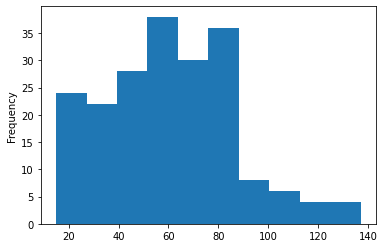

In [7]:
#Univariate Analysis
df["Annual Income (k$)"].plot(kind='hist');

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


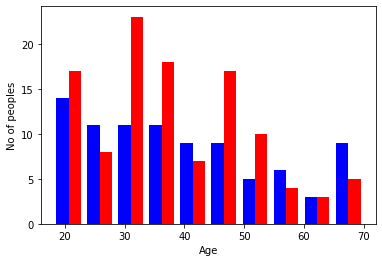

In [10]:
#Bi-Variate Analysis
cy=df[df.Gender	=="Male"].Age
cn=df[df.Gender=="Female"].Age
plt.xlabel("Age")
plt.ylabel("No of peoples")
plt.hist([cy,cn],color=['blue','red'],label=["Height=yes"])
plt.show()

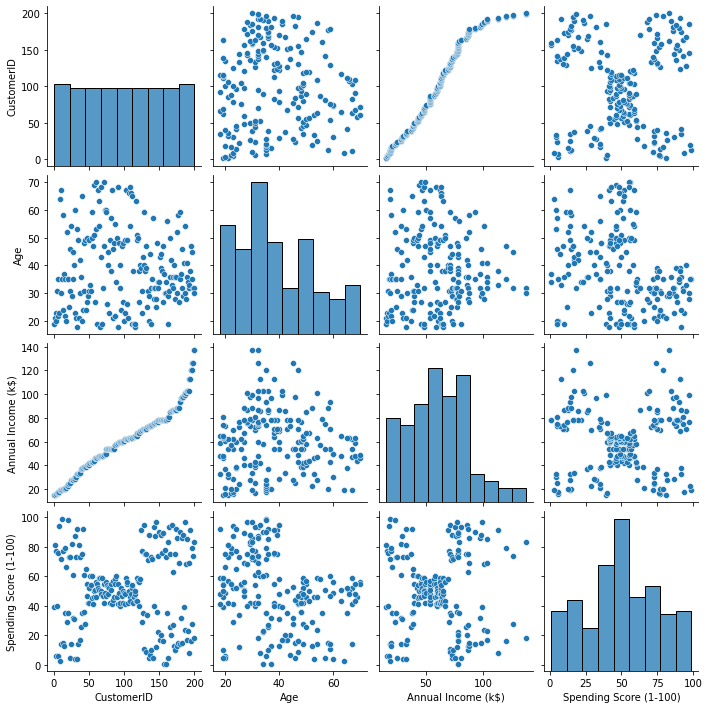

In [11]:
#Multi-variate Analysis
sns.pairplot(df)

In [12]:
#Descriptive statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
#Handle The Missing values
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
#Find the outliers
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [16]:
#Split data into dependent and independent variables
x=df.iloc[:,3:13].values
y=df.iloc[:,13:14].values
x.shape

(200, 2)

In [17]:
y.shape

(200, 0)

In [ ]:
#Categorical colums and encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([("oh",OneHotEncoder(),[1,2])],remainder="passthrough")
x=ct.fit_transform(x)
x.shape

In [24]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(160, 2)

In [26]:
x_test.shape

(40, 2)

In [27]:
#Scale the independent variables
X = df.iloc[:, :-1].values
print(X)

[[1 'Male' 19 15]
 [2 'Male' 21 15]
 [3 'Female' 20 16]
 [4 'Female' 23 16]
 [5 'Female' 31 17]
 [6 'Female' 22 17]
 [7 'Female' 35 18]
 [8 'Female' 23 18]
 [9 'Male' 64 19]
 [10 'Female' 30 19]
 [11 'Male' 67 19]
 [12 'Female' 35 19]
 [13 'Female' 58 20]
 [14 'Female' 24 20]
 [15 'Male' 37 20]
 [16 'Male' 22 20]
 [17 'Female' 35 21]
 [18 'Male' 20 21]
 [19 'Male' 52 23]
 [20 'Female' 35 23]
 [21 'Male' 35 24]
 [22 'Male' 25 24]
 [23 'Female' 46 25]
 [24 'Male' 31 25]
 [25 'Female' 54 28]
 [26 'Male' 29 28]
 [27 'Female' 45 28]
 [28 'Male' 35 28]
 [29 'Female' 40 29]
 [30 'Female' 23 29]
 [31 'Male' 60 30]
 [32 'Female' 21 30]
 [33 'Male' 53 33]
 [34 'Male' 18 33]
 [35 'Female' 49 33]
 [36 'Female' 21 33]
 [37 'Female' 42 34]
 [38 'Female' 30 34]
 [39 'Female' 36 37]
 [40 'Female' 20 37]
 [41 'Female' 65 38]
 [42 'Male' 24 38]
 [43 'Male' 48 39]
 [44 'Female' 31 39]
 [45 'Female' 49 39]
 [46 'Female' 24 39]
 [47 'Female' 50 40]
 [48 'Female' 27 40]
 [49 'Female' 29 40]
 [50 'Female' 31

In [28]:
import joblib
joblib.dump(ct,"Mall_Customers.pkl")

['Mall_Customers.pkl']

In [ ]:
#Split the data into training and testing 
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
#print(train)
#print(test)

In [31]:
# Build the Model 
my_dict=pd.read_csv("/Mall_Customers.csv")
df = pd.DataFrame(my_dict)
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [32]:
#  Build the Model 
import csv
with open("/Mall_Customers.csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    df = pd.DataFrame([csv_reader], index = None)
for val in list(df[1]):
    print(val)

['1', 'Male', '19', '15', '39']


In [ ]:
# Training and Testing Module 
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
print(train)
print(test)

In [ ]:
#Measure the performance using matrics
from __future__ import print_function

import pandas as pd
path = "/abalone.csv"
merged = pd.read_csv(path, error_bad_lines=False, low_memory=False)

X = merged.text
y = merged.grid

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_train_dtm, y_train)

y_pred_class = nb.predict(X_test_dtm)

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_class))